In [18]:
%matplotlib widget

# To prevent automatic figure display when execution of the cell ends
# %config InlineBackend.close_figures=False 

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import numpy as np
from dataclasses import dataclass
from traitlets import HasTraits, Float

from ipywidgets import widgets

from IPython.display import display,clear_output
from scipy import spatial
import some_math

In [19]:
# https://stackoverflow.com/questions/17330122/get-pixels-inside-a-patch
polygon = r1.get_verts()
polygon

AttributeError: 'NoneType' object has no attribute 'get_verts'

In [ ]:
fig = ax = None

In [ ]:
# plt.ioff()
if fig is None or ax is None:
    fig, ax = plt.subplots()

In [ ]:
# out=widgets.Output()
button=widgets.Button(description='Next')
text1=widgets.Text(description="x1,y1", value="1,1")
text2=widgets.Text(description="x2,y2", value="2,2")
text3=widgets.Text(description="h1,th1,h2,th2", value="1,0,2,45")
text_log=widgets.Textarea()
vbox=widgets.VBox([
    widgets.HBox([
        button,
        text1,
        text2,
    ]),
        text3,
    text_log,
])
r1 = None
r2 = None

def get_xy(string_point):
    x,y = string_point.split(',')
    return int(x), int(y)

def click(b):
    ax.clear()
    x = np.random.randn(100)
    y = np.random.randn(100)
    ax.plot(x,y,'+')
    x1,y1 = get_xy(text1.value)
    x2,y2 = get_xy(text2.value)
    x3,y3 = x[x1],y[y1]
    x4,y4 = x[x2],y[y2]
    text_log.value = ''
    for xn,yn in ((x1,y1), (x2,y2), (x3,y3), (x4,y4)):
        text_log.value += f'{np.round(xn,2)},{np.round(yn,2)}\n'
    
    h1,th1,h2,th2 = (int(val) for val in text3.value.split(','))
    
    r1 = patches.Rectangle((x3,y3), h1, h2, color='blue', alpha=0.5)
    t1 = mpl.transforms.Affine2D().rotate_deg_around(x3,y3,th1) + ax.transData
    r1.set_transform(t1)
    ax.add_patch(r1)
    
    r2 = patches.Rectangle((x1,y1), h2, h1, color='red', alpha=0.5)
    t2 = mpl.transforms.Affine2D().rotate_deg_around(x1,y1,th2) + ax.transData
    r2.set_transform(t2)
    ax.add_patch(r2)
    
    line1 = plt.Line2D(x[[x1, x2]], y[[y1, y2]], lw=1.5, color='blue')
    ax.add_line(line1)
    line2 = plt.Line2D((x1,x2), (y1,y2), lw=1.5, color='red')
    ax.add_line(line2)
    fig.canvas.draw()
    # with out:
    #     clear_output(wait=True)
        # display(fig)

button.on_click(click)
click(None)
# fig.canvas.draw()
display(vbox)
plt.show(fig)

In [109]:
import importlib
importlib.reload(some_math)

lf = some_math.LinearFace()

{'name': 'value', 'old': '', 'new': '0,0', 'owner': Point(value='0,0', description='p0'), 'type': 'change'}
{'name': 'value', 'old': '', 'new': '0,0', 'owner': Point(value='0,0', description='p1'), 'type': 'change'}
{'name': 'value', 'old': '', 'new': '0,0', 'owner': Point(value='0,0', description='midpoint'), 'type': 'change'}
{'name': 'value', 'old': '', 'new': '0,0', 'owner': Point(value='0,0', description='rect origin'), 'type': 'change'}
{'name': 'x', 'old': 0.0, 'new': 1.0, 'owner': Point(value='0,0', description='p1'), 'type': 'change'}
{'name': 'value', 'old': '0,0', 'new': '1.0,0.0', 'owner': Point(value='1.0,0.0', description='p1'), 'type': 'change'}
{'name': 'value', 'old': '0,0', 'new': '1.0,0.0', 'owner': Point(value='1.0,0.0', description='p1'), 'type': 'change'}
{'name': 'x', 'old': 0.0, 'new': 0.5, 'owner': Point(value='0,0', description='midpoint'), 'type': 'change'}
{'name': 'value', 'old': '0,0', 'new': '0.5,0.0', 'owner': Point(value='0.5,0.0', description='midpoint

In [112]:
lf.layout

In [71]:
np.sqrt(5)

2.23606797749979

In [42]:
l.midpoint()

(0.0, 0.0)

In [ ]:
class Shapes:
    def __init__(self):
        pass
    

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

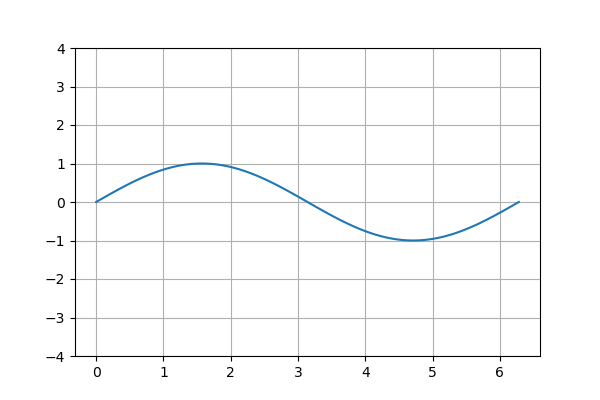

In [2]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

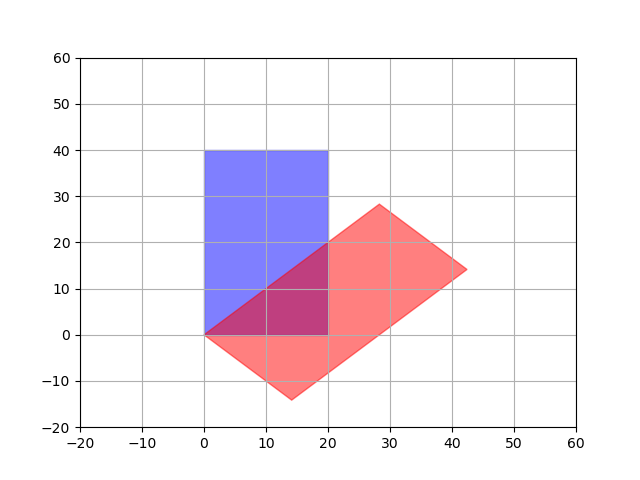

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)

r1 = patches.Rectangle((0,0), 20, 40, color="blue", alpha=0.50)
r2 = patches.Rectangle((0,0), 20, 40, color="red",  alpha=0.50)

t2 = mpl.transforms.Affine2D().rotate_deg(-45) + ax.transData
r2.set_transform(t2)

ax.add_patch(r1)
ax.add_patch(r2)

plt.xlim(-20, 60)
plt.ylim(-20, 60)

plt.grid(True)

plt.show()